<a href="https://colab.research.google.com/github/eigu/SALES-DATASET-FINALS/blob/main/SALES_DATASET_FINALS_DATA_SCIENCE_SEGMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

df = pd.read_csv('/content/drive/Shareddrives/FINALS DATASETS/sales_data.csv')

#EDA

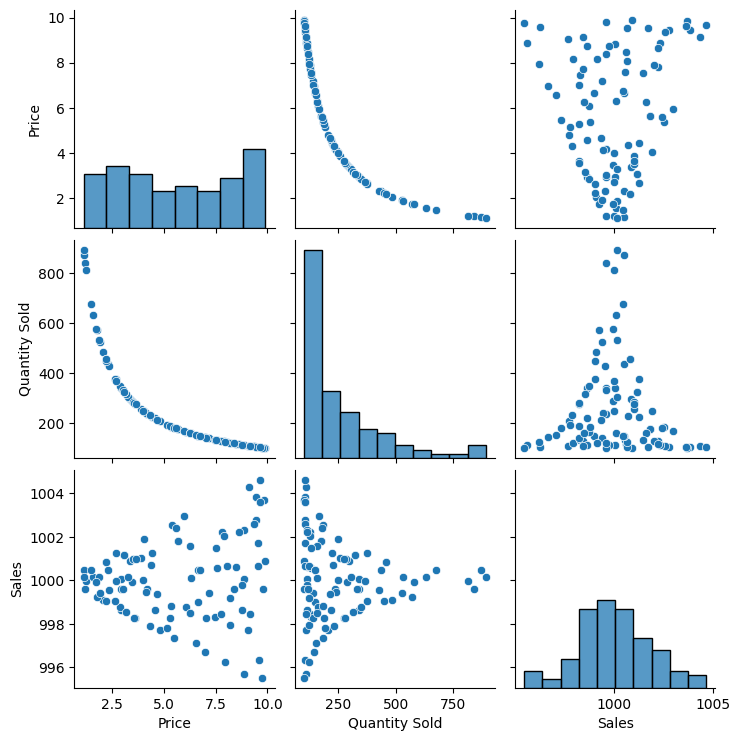

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)

#Modelling

##Customer Segmentation

Cluster Centers:
[[ 80.528       12.43478261]
 [ 15.33782609   4.41304348]
 [129.591       19.25      ]
 [ 43.80881279   7.76712329]]


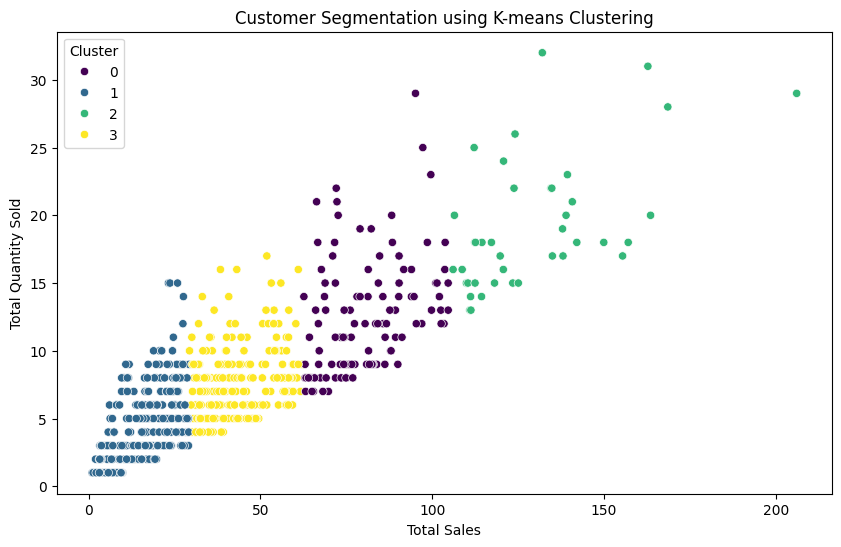

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of rows for your dataset
num_rows = 1000

# Seed for reproducibility
np.random.seed(0)

# Generate customer IDs
customer_ids = np.random.randint(1000, 2000, size=num_rows)

# Generate food item names and corresponding types
food_items = ['Cheeseburger', 'French Fries', 'Pizza Slice', 'Salad', 'Soft Drink', 'Ice Cream']
food_types = ['Fast Food', 'Fast Food', 'Fast Food', 'Healthy', 'Beverage', 'Dessert']
food_type_dict = dict(zip(food_items, food_types))

# Generate random data for food sales
food_data = {
    'Customer ID': customer_ids,
    'Food Item': np.random.choice(food_items, size=num_rows),
    'Price': np.round(np.random.uniform(1.0, 10.0, size=num_rows), 2),
    'Quantity Sold': np.random.randint(1, 10, size=num_rows)
}

# Calculate sales
food_data['Sales'] = food_data['Price'] * food_data['Quantity Sold']

# Create a DataFrame
df = pd.DataFrame(food_data)

# Aggregate data by customer
customer_data = df.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Quantity Sold': 'sum'
}).reset_index()

# Perform K-means clustering
X = customer_data[['Sales', 'Quantity Sold']]

# Choose the number of clusters and set n_init explicitly
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0)
customer_data['Cluster'] = kmeans.fit_predict(X)

# Print the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Sales', y='Quantity Sold', hue='Cluster', palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Total Quantity Sold')
plt.title('Customer Segmentation using K-means Clustering')
plt.legend(title='Cluster')
plt.show()


#What are the type of customers base on the properties and total sales? (Mid-eater, High Eater spender etc, no wrong answers)

##Blue Cluster: Low Spenders </br>
Total Sales: 15.34 </br>
Total Quantity Sold: 4.41 </br>
These customers have the lowest total sales and quantity sold. </br>
They might be occasional or new customers. </br>
##Yellow Cluster: Medium Spenders </br>
Total Sales: 43.81 </br>
Total Quantity Sold: 7.77 </br>
This group shows moderate total sales and quantity sold. </br>
They could be regular customers with average purchasing habits. </br>
##Purple Cluster: High Spenders </br>
Total Sales: 80.53 </br>
Total Quantity Sold: 12.43 </br>
These customers have higher total sales and quantity sold compared to the previous clusters. </br>
They might be frequent buyers or loyal customers. </br>
##Green Cluster: Very High Spenders </br>
Total Sales: 129.59 </br>
Total Quantity Sold: 19.25 </br>
This small cluster represents customers with the highest total sales and quantity sold. </br>
These could be considered VIP customers or bulk buyers. </br>